<a href="https://colab.research.google.com/github/sujataprasad01/DL-Sentimental-Analysis-using-Natural-Language-Processing/blob/main/Sentimental_Analysis_using_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
!pip install wordcloud

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# NLTK

import nltk
from nltk.corpus import stopwords

# Wordcloud

from wordcloud import wordcloud

nltk.download('stopwords')
nltk.download('wordnet')

# Sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Evalution Metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

# Import the dataset

In [ ]:
# https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.txt.zip', delimiter=';', names=['text', 'label'])
df_val=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/val.txt' , delimiter=';', names=['text', 'label'])

In [ ]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [ ]:
df.shape

(18000, 2)

In [ ]:
df.sample(5)

,text,label
11324,i say this because she never truly gets a choi...,sadness
15846,i feel safe and accepted,joy
3857,i went miles and it wasnt that i felt tired bu...,sadness
6568,i wanted to not feel frightened anymore,fear
10317,i was hoping by then i would feel ok,joy


In [ ]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

<Axes: >

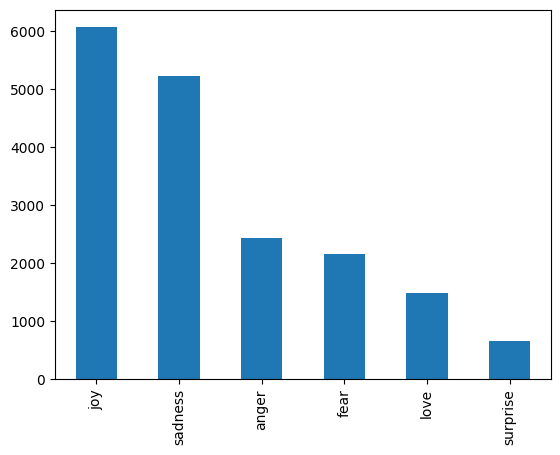

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df.label.replace(to_replace=['joy', 'love', 'surprise'], value=1, inplace=True)
df.label.replace(to_replace=['sadness', 'anger', 'fear'], value=0, inplace=True)

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [ ]:
df.label.value_counts()

0    9799
1    8201
Name: label, dtype: int64

<Axes: >

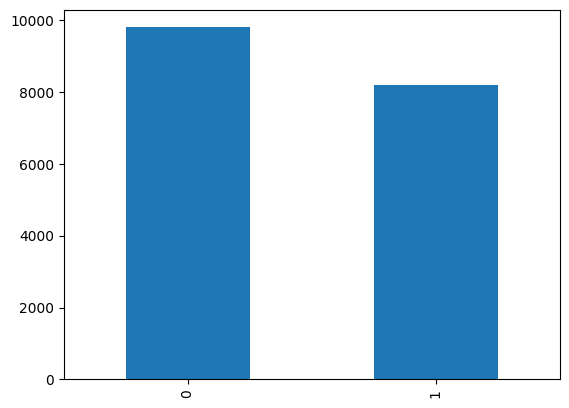

In [ ]:
df.label.value_counts().plot.bar()

# Preprocsessing

In [ ]:
lm=nltk.WordNetLemmatizer()

In [ ]:
# def transformation(input)

In [ ]:
new_text=[]
for i in df.text:
   li=re.sub('[0-9]',' ', str(i))
   li =li.lower()
   li =li.split()
   li=[lm.lemmatize(j) for j in li if j not in set(stopwords.words('english'))]
   new_text.append(' '.join(str(k) for k in li))

In [ ]:
new_text

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [ ]:
# Word Cloud

In [ ]:
plt.figure(figsize=(20,8))
word=''
for i in new_text:
  for j in i:
    word +=" ".join(j)

<Figure size 2000x800 with 0 Axes>

In [ ]:
word

'didnt feel humiliatedgo feeling hopeless damned hopeful around someone care awakeim grabbing minute post feel greedy wrongever feeling nostalgic fireplace know still propertyfeeling grouchyive feeling little burdened lately wasnt sureive taking milligram time recommended amount ive fallen asleep lot faster also feel like funnyfeel confused life teenager jaded year old manpetronas year feel petronas performed well made huge profitfeel romanticfeel like make suffering seeing mean somethingfeel running divine experience expect type spiritual encounterthink easiest time year feel dissatisfiedfeel low energy thirstyimmense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little preciousfeel reassured anxiety sidedidnt really feel embarrassedfeel pretty pathetic timestarted feeling sentimental doll child began collection vintage barbie doll sixtyfeel compromised skeptical value every unit work putfeel irritated rej

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=1000, height=500, background_color='white', min_font_size=10).generate(word)

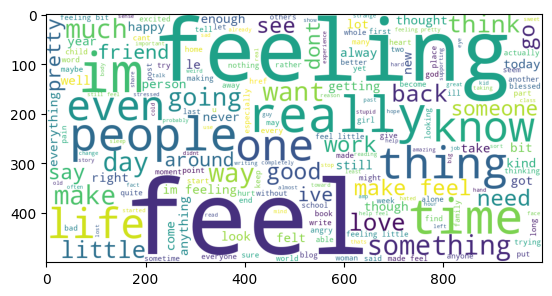

In [ ]:
plt.imshow(wc)

# Bag of words

In [ ]:
# Bag of Words model (BOW)

In [ ]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(new_text)
X_train=traindata
y_train=df.label

In [ ]:
X_train

<18000x117594 sparse matrix of type '<class 'numpy.int64'>'
	with 311217 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

0        0
1        0
2        0
3        1
4        0
        ..
17995    0
17996    1
17997    1
17998    1
17999    1
Name: label, Length: 18000, dtype: int64

# Model Selection

In [ ]:
model=RandomForestClassifier()

In [ ]:
# Hyperparameter Tuning

parameters={
    'max_features':('auto', 'sqrt'),
    'n_estimators':[500, 1000, 1500],
    'max_depth':[5,10,None],
    'min_samples_leaf':[1,2,5,10],
    'min_samples_split':[5,10,15],
    'bootstrap':[True, False]
}

In [ ]:
parameters

{'max_features': ('auto', 'sqrt'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True, False]}

In [ ]:
grid_search=GridSearchCV(model,
                         parameters,
                         cv=5,
                         return_train_score=True,
                         n_jobs=1)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
grid_search.best_params_

In [ ]:
rfc=RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                           n_estimators=grid_search.best_params_['n_estimators'],
                           max_depth=grid_search.best_params_['max_depth'],
                           min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                           min_samples_split=grid_search.best_params_['min_samples_split'],
                           bootstrap=grid_search.best_params_['bootstrap'],
                          )

In [ ]:
rfc.fit(X_train, y_train)

# Testing

In [ ]:


# Repeat all the process for testing data..same as training i did
# after that



In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
def sentimental_analysis(input):
 new_input= transformation(input)
 transformed_input=cv.transform(new_input)
 prediction=rfc.predict(transformed_input)
 if prediction==0:
  print('Negative Sentiment')
 elif prediction==1:
  print('Positive Sentiment')
 else:
  print('Invalid Sentiment')

In [ ]:
input="Today I was playing in the park and I felt"
inp=input(" ")

In [ ]:
sentimental_analysis(inp)

# Saving Model with Pickle

In [ ]:
import pickle

# Save to a file
with open("model.pkl", "wb") as file:
    pickle.dump(rfc, file)


In [ ]:
# Load from a file
# with open("model.pkl", "rb") as file:
#     loaded_data = pickle.load(file)

# print(loaded_data)
